# What are the differences in the sinograms if I move a single point

In [53]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 27.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
# import of all necessary libraries
import tqdm
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import neurite as ne
import voxelmorph as vxm
import odl
from tensorflow.keras.layers import Dense
import cv2

In [2]:
# https://github.com/odlgroup/odl/blob/master/examples/tomo/filtered_backprojection_cone_2d.py

reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[256, 256],
    dtype='float32')
angle_partition = odl.discr.partition.RectPartition(intv_prod=odl.set.domain.IntervalProd(0, 2 * np.pi), grid=odl.discr.grid.RectGrid(np.linspace(0,2*np.pi,360)))
# Detector: uniformly sampled, n = 512, min = -60, max = 60
detector_partition = odl.discr.partition.RectPartition(intv_prod=odl.set.domain.IntervalProd(-60, 60), grid=odl.discr.grid.RectGrid(np.linspace(-60, 60, 512)))
# Geometry with large fan angle
geometry = odl.tomo.geometry.conebeam.FanFlatGeometry(
    apart=angle_partition, dpart=detector_partition, src_radius=40, det_radius=40)
# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

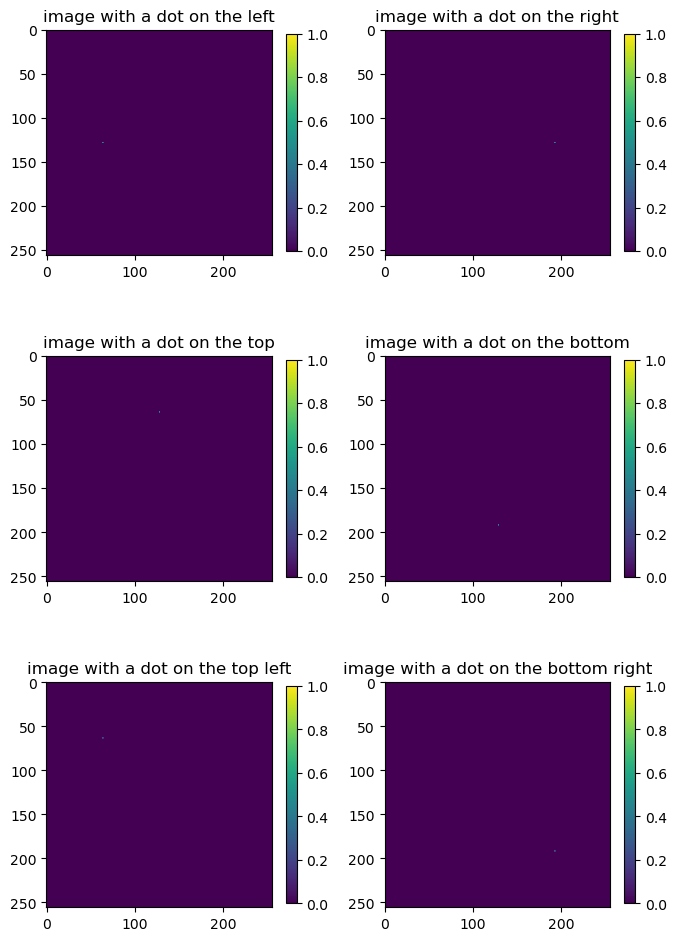

In [46]:
# Créer une image vierge de taille 256x256
image = np.zeros((256, 256))
image2 = np.zeros((256,256))
image3 = np.zeros((256,256))
image4 = np.zeros((256,256))
image5 = np.zeros((256,256))
image6 = np.zeros((256,256))

# Ajouter le point au centre de l'image
image[128, 64] = 1
image2[128, 192] = 1
image3[64, 128] = 1
image4[192, 128] = 1
image5[64, 64]=1
image6[192, 192]=1

# Afficher les images
fig = plt.figure(figsize=(8, 12))
rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.title("image with a dot on the left")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 2)
plt.imshow(image2)
plt.title("image with a dot on the right")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 3)
plt.imshow(image3)
plt.title("image with a dot on the top")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 4)
plt.imshow(image4)
plt.title("image with a dot on the bottom")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 5)
plt.imshow(image5)
plt.title("image with a dot on the top left")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 6)
plt.imshow(image6)
plt.title("image with a dot on the bottom right")
plt.colorbar(shrink=0.8)

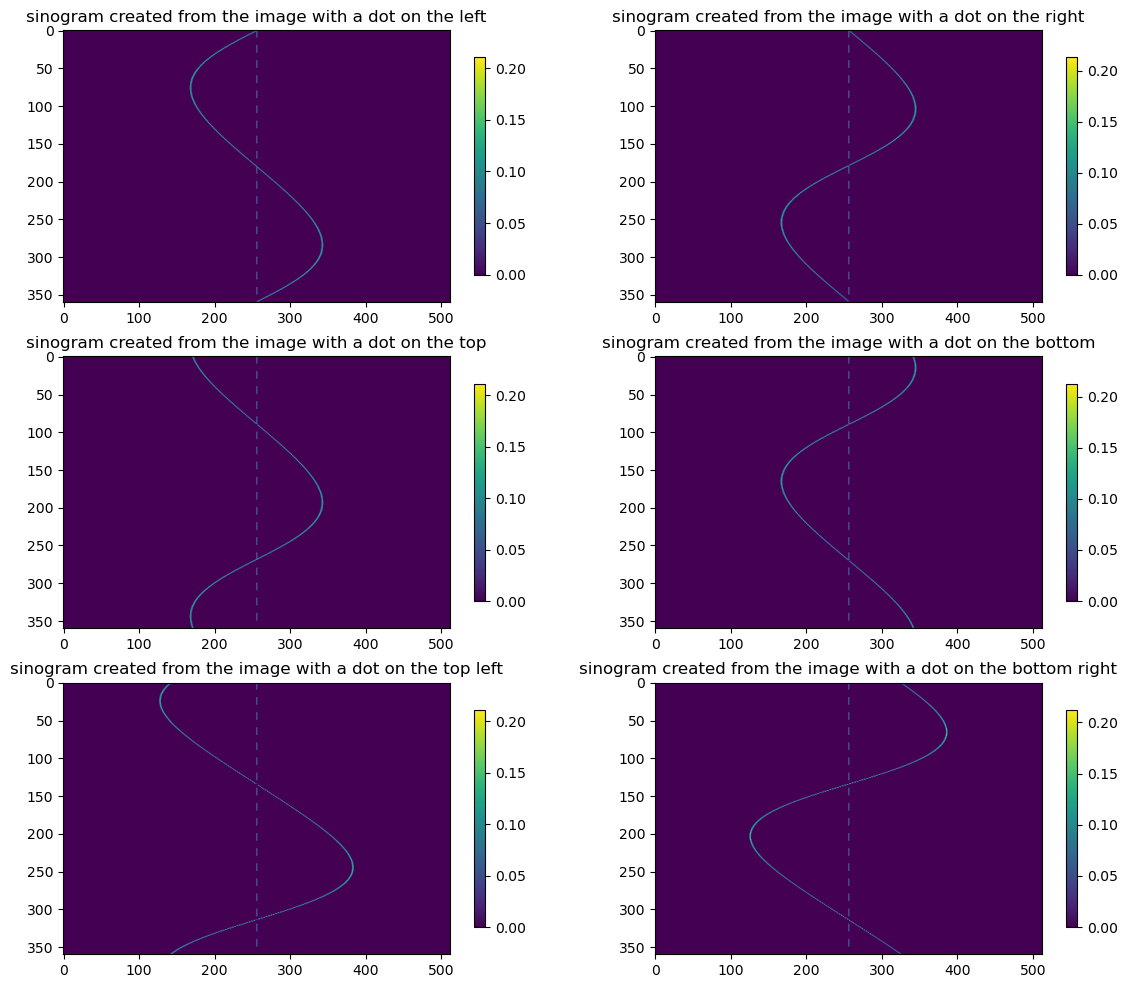

In [60]:
# creation of the sinograms
sino = ray_trafo(image[:,:])
sino2 = ray_trafo(image2[:,:]) 
sino3 = ray_trafo(image3[:,:]) 
sino4 = ray_trafo(image4[:,:]) 
sino5 = ray_trafo(image5[:,:])
sino6 = ray_trafo(image6[:,:])

# Coordonnées du milieu de l'image
middle_x = sino.shape[1] // 2

# Indice des lignes pour le pointillé
rows = np.arange(0, sino.shape[0])
is_dashed = np.floor(rows / 10) % 2 == 0

# Remplir la colonne avec des valeurs en pointillé
sino[:, middle_x] = np.where(is_dashed, 0.1, 0)
sino2[:, middle_x] = np.where(is_dashed, 0.1, 0)
sino3[:, middle_x] = np.where(is_dashed, 0.1, 0)
sino4[:, middle_x] = np.where(is_dashed, 0.1, 0)
sino5[:, middle_x] = np.where(is_dashed, 0.1, 0)
sino6[:, middle_x] = np.where(is_dashed, 0.1, 0)

#affichage
fig = plt.figure(figsize=(14, 12))
rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(sino)
plt.title("sinogram created from the image with a dot on the left")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 2)
plt.imshow(sino2)
plt.title("sinogram created from the image with a dot on the right")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 3)
plt.imshow(sino3)
plt.title("sinogram created from the image with a dot on the top")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 4)
plt.imshow(sino4)
plt.title("sinogram created from the image with a dot on the bottom")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 5)
plt.imshow(sino5)
plt.title("sinogram created from the image with a dot on the top left")
plt.colorbar(shrink=0.8)

fig.add_subplot(rows, columns, 6)
plt.imshow(sino6)
plt.title("sinogram created from the image with a dot on the bottom right")
plt.colorbar(shrink=0.8)